In [8]:
from sympy.interactive.printing import init_printing
from sympy import *
import numpy as np 
init_printing(use_unicode=True)

# Fourier Series
## Introduction 
For a periodic function $f$ of period $P$, the Fourier series expansion enables to write the function with the following form:
$$
f(t) = \frac{a_{0}}{2} + \sum^{\infty}_{n=1} a_{n} \cos (2n\pi \frac{t}{P}) + \sum^{\infty}_{n=1} b_{n} \sin (2n\pi \frac{t}{P})
$$

where the constant coefficients $a_n$ and $b_n$ are defined according to: 
$$
a_n = \frac{2}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t) \cos(2n\pi\frac{t}{P})dt
$$
, 
$$
b_n = \frac{2}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t) \sin(2n\pi\frac{t}{P})dt
$$
and the first term of expansion is defined by $a_{0}$ is twice the average of $f(t)$ over the domain $P$:
$$
\frac{a_{0}}{2} = \frac{1}{P}\int^{\frac{P}{2}}_{-\frac{P}{2}}f(t)dt
$$

We can notice that:
* if $f$ is an even function, which means $f(-t) = f(t)$, then $\forall n \in   \rm I\!N^{+}, b_{n} = 0 $
* if $f$ is an odd function, which means $f(-t) = -f(t)$, then $\forall n \in   \rm I\!N^{+}, a_{n} = 0 $

## Exercises
### 1. Fourier Series expansion of basic functions 
For both functions of $f(t)=t$ and $f(t) = \vert \cos(\pi\frac{t}{P})\vert$ 
* Q.1 - Define the function, with the assumption that is only defined on $P$.
* Q.2 - Plot the function over $[\frac{-P}{2}, \frac{P}{2}]$ with $P = 1$
* Q.3 - compute manually $a_n$ and $b_n$ and check if the function is even or odd 
* Q.4 - Give the first seven elements of $a_n$ or $b_n$ depending if the function is odd or even 

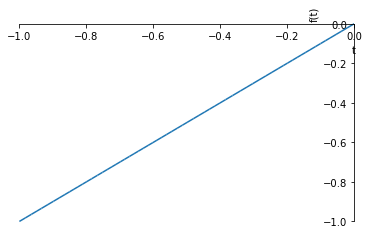

In [58]:
t= symbols('t', positive=True)
def f(t):
    return t

plot(f(t), (t, -1/2, 1/2) )

In [59]:
n,p=symbols('n,p',positive=True)

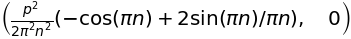

In [60]:
a_n=(2/p)*(integrate(f(t)*cos(2*pi*n*t/p),t,(t,-p/2,p/2)))
b_n=(2/p)*(integrate(f(t)*sin(2*pi*n*t/p),t,(t,-p/2,p/2)))
a_n.trigsimp(),b_n.trigsimp()

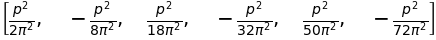

In [61]:
[a_n.subs({n:i}) for i in range (1,7)]

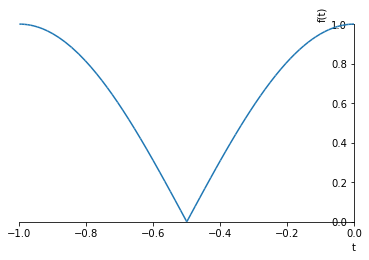

In [62]:
def f(t,p):
    return abs(cos(pi*(t/p)))
plot (f(t,1),(t,-1/2,1/2))

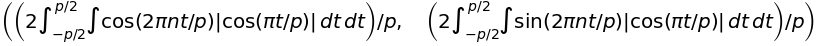

In [63]:
a_n=(2/p)*(integrate(f(t,p)*cos(2*pi*n*t/p),t,(t,-p/2,p/2)))
b_n=(2/p)*(integrate(f(t,p)*sin(2*pi*n*t/p),t,(t,-p/2,p/2)))
a_n.trigsimp(),b_n.trigsimp()

In [65]:
a_n=(2/p)*(integrate(cos(pi*(t/p))*cos(2*pi*n*t/p),t,(t,-p/2,p/2)))
b_n=(2/p)*(integrate(cos(pi*(t/p))*sin(2*pi*n*t/p),t,(t,-p/2,p/2)))
[a_n.subs({p:i}) for p in range (1,7)],[b_n.subs({p:i}) for p in range (1,7)]

⎛                    ⎡  ⎛⎧       2                    ⎞                       
⎜                    ⎢  ⎜⎪      p                     ⎟                       
⎜                    ⎢  ⎜⎪     ────        for n = 1/2⎟    ⎛⎧        6        
⎜                    ⎢  ⎜⎪        6                   ⎟    ⎜⎪       p         
⎜                    ⎢  ⎜⎪     4⋅π                    ⎟    ⎜⎪      ───        
⎜                    ⎢  ⎜⎪                            ⎟    ⎜⎪      4⋅π        
⎜                    ⎢2⋅⎜⎨     2                      ⎟    ⎜⎪                 
⎜                    ⎢  ⎜⎪8⋅n⋅p ⋅cos(π⋅n)             ⎟  6⋅⎜⎨     6           
⎜                    ⎢  ⎜⎪───────────────   otherwise ⎟    ⎜⎪8⋅n⋅p ⋅cos(π⋅n)  
⎜                    ⎢  ⎜⎪              2             ⎟    ⎜⎪───────────────  
⎜                    ⎢  ⎜⎪⎛     2      ⎞              ⎟    ⎜⎪             6   
⎜                    ⎢  ⎜⎪⎝4⋅π⋅n  - 6⋅π⎠              ⎟    ⎜⎪ ⎛     6    ⎞    
⎜                    ⎢  ⎝⎩                          

## Fourier Series functions of sympy

In [66]:
s= fourier_series(f(t,1), (t, -pi, pi))

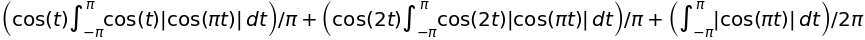

In [67]:
s.truncate(3)

In [68]:
from sympy.series import fourier

In [69]:
s2 = fourier.fourier_series(f(t,1), (-pi, pi))


In [73]:
s2.an

⎡       π                                 π                                   
⎢       ⌠                                 ⌠                                   
⎢cos(t)⋅⎮  cos(t)⋅│cos(π⋅t)│ dt  cos(2⋅t)⋅⎮  cos(2⋅t)⋅│cos(π⋅t)│ dt  cos(3⋅t)⋅
⎢       ⌡                                 ⌡                                   
⎢       -π                                -π                                  
⎢──────────────────────────────, ──────────────────────────────────, ─────────
⎣              π                                 π                            

π                                   π                           ⎤
⌠                                   ⌠                           ⎥
⎮  cos(3⋅t)⋅│cos(π⋅t)│ dt  cos(4⋅t)⋅⎮  cos(4⋅t)⋅│cos(π⋅t)│ dt   ⎥
⌡                                   ⌡                           ⎥
-π                                  -π                          ⎥
─────────────────────────, ──────────────────────────────────, …⎥
       π                                   π      

In [71]:
if s2.is_even:
    print ('yes')
else:
    print ('No')

No


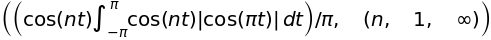

In [74]:
s2.an.args